# 1. Importing the libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

# 2. Importing the dataset

In [108]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv')

In [109]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [110]:
raw_df.shape

(12032, 12)

In [111]:
raw_df.dtypes

Zomato URL                object
Name of Restaurant        object
Address                   object
Location                  object
Cuisine                   object
Top Dishes                object
Price for 2              float64
Dining Rating             object
Dining Rating Count       object
Delivery Rating           object
Delivery Rating Count     object
Features                  object
dtype: object

In [112]:
len(raw_df['Name of Restaurant'].unique())

8369

In [113]:
raw_df.isna().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [114]:
raw_df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining','Not enough Delivery Reviews','Not enough Dining Reviews'], value =np.nan,inplace=True)
raw_df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes               9641
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64

In [115]:
feature_na=[feature for feature in raw_df.columns if raw_df[feature].isnull().sum()>0]
feature_na

['Top Dishes',
 'Dining Rating',
 'Dining Rating Count',
 'Delivery Rating',
 'Delivery Rating Count']

In [116]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(raw_df[feature].isnull().sum()/len(raw_df)*100,4)))

Top Dishes has 80.128 % missing values
Dining Rating has 44.4731 % missing values
Dining Rating Count has 44.4731 % missing values
Delivery Rating has 48.6287 % missing values
Delivery Rating Count has 48.6287 % missing values


In [117]:
raw_df['Dining Rating'].unique()

array(['4.3', '4.4', '4.0', '4.2', '4.1', nan, '3.9', '4.5', '4.7', '3.5',
       '4.6', '3.6', '3.8', '4.9', '4.8', '3.7', '2.7', '2.9', '2.6',
       '3.0', '3.4', '2.4', '3.3', '2.8', '2.1', '2.0', '2.2', '3.2',
       '2.5', '3.1', '2.3', '1.9', '1.7', '0.3', '1.0'], dtype=object)

<Axes: xlabel='Name of Restaurant'>

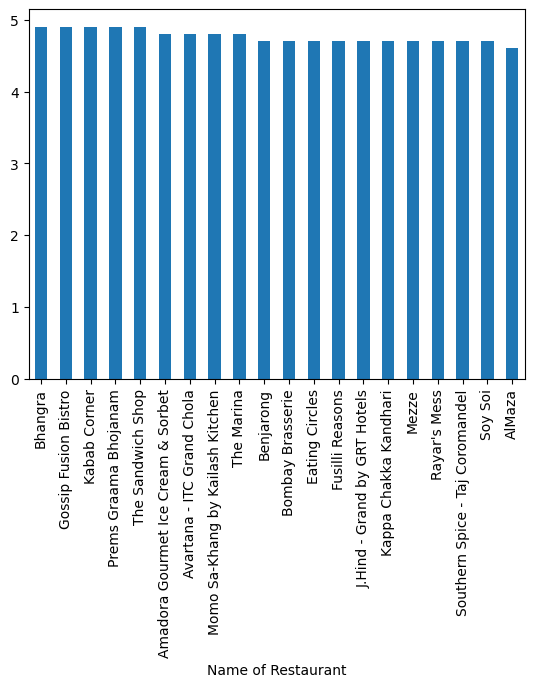

In [118]:
raw_df['Dining Rating']=raw_df['Dining Rating'].astype(float)
raw_df.dropna(axis='index',subset=['Dining Rating'],inplace=True)
raw_df.groupby('Name of Restaurant')['Dining Rating'].mean().nlargest(20).plot.bar()

In [119]:
raw_df_rate=raw_df.groupby('Name of Restaurant')['Dining Rating'].mean().to_frame()
raw_df_rate=raw_df_rate.reset_index()
raw_df_rate.columns=['restaurant','rating']
raw_df_rate.head(20)

,restaurant,rating
0,10 Muffins,2.0
1,101 Dosa,3.6
2,11 O Cafe,3.8
3,11-Eleven Pizza,3.8
4,175 ECR,3.1
5,18 Degree North - Clarion Hotel,2.9
6,18+ Restaurant and Bar,2.7
7,186° Celcius,3.6
8,196 Degree Below,4.0
9,2 Brothers Biriyani,3.8


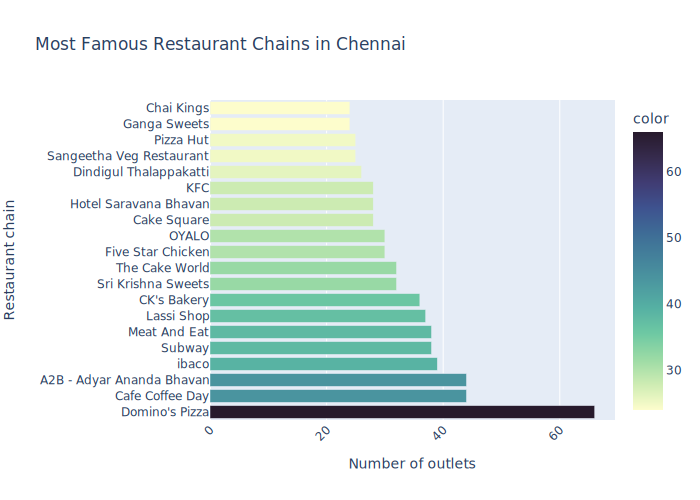

In [173]:
import plotly.express as px

# Get the top 20 restaurant chains
chains = raw_df['Name of Restaurant'].value_counts().nlargest(20)

# Create a bar graph
fig = px.bar(x=chains.values, y=chains.index, orientation='h', labels={'x': 'Number of outlets', 'y': 'Restaurant chain'},
             title='Most Famous Restaurant Chains in Chennai', color=chains.values, color_continuous_scale='deep')

# Update layout
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()
 


In [121]:
food = []

for i in raw_df.Cuisine:
    str1 = ""
    str1 = (str1.join(i))
    str1 = str1.split(', ')
    food.append(str1)

In [122]:
f_category = []
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            f_category.append(i) 
            
for i in food:
    reemovNestings(i)

food_category_raw_df = pd.DataFrame({"Food" : f_category})

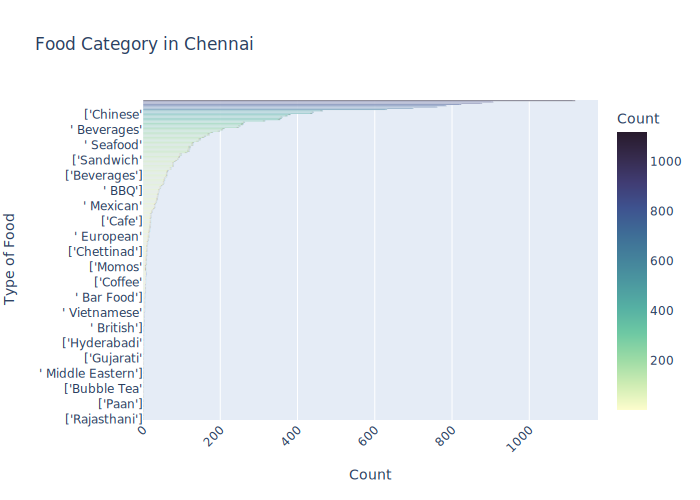

In [174]:
import plotly.express as px

# Calculate the count of each food category
food_category_count = food_category_raw_df['Food'].value_counts()

# Create a dataframe for plotting
food_category_count_df = food_category_count.reset_index()
food_category_count_df.columns = ['Food', 'Count']

# Create a bar graph
fig = px.bar(food_category_count_df, y='Food', x='Count', orientation='h', 
             labels={'Count': 'Count', 'Food': 'Type of Food'}, 
             title='Food Category in Chennai', color='Count',
             text='Count', color_continuous_scale='deep')

# Update layout
fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  xaxis_tickangle=-45, 
                  xaxis_title='Count', 
                  yaxis_title='Type of Food')
# Show the plot
fig.show()


Text(0.5, 0, 'Features')

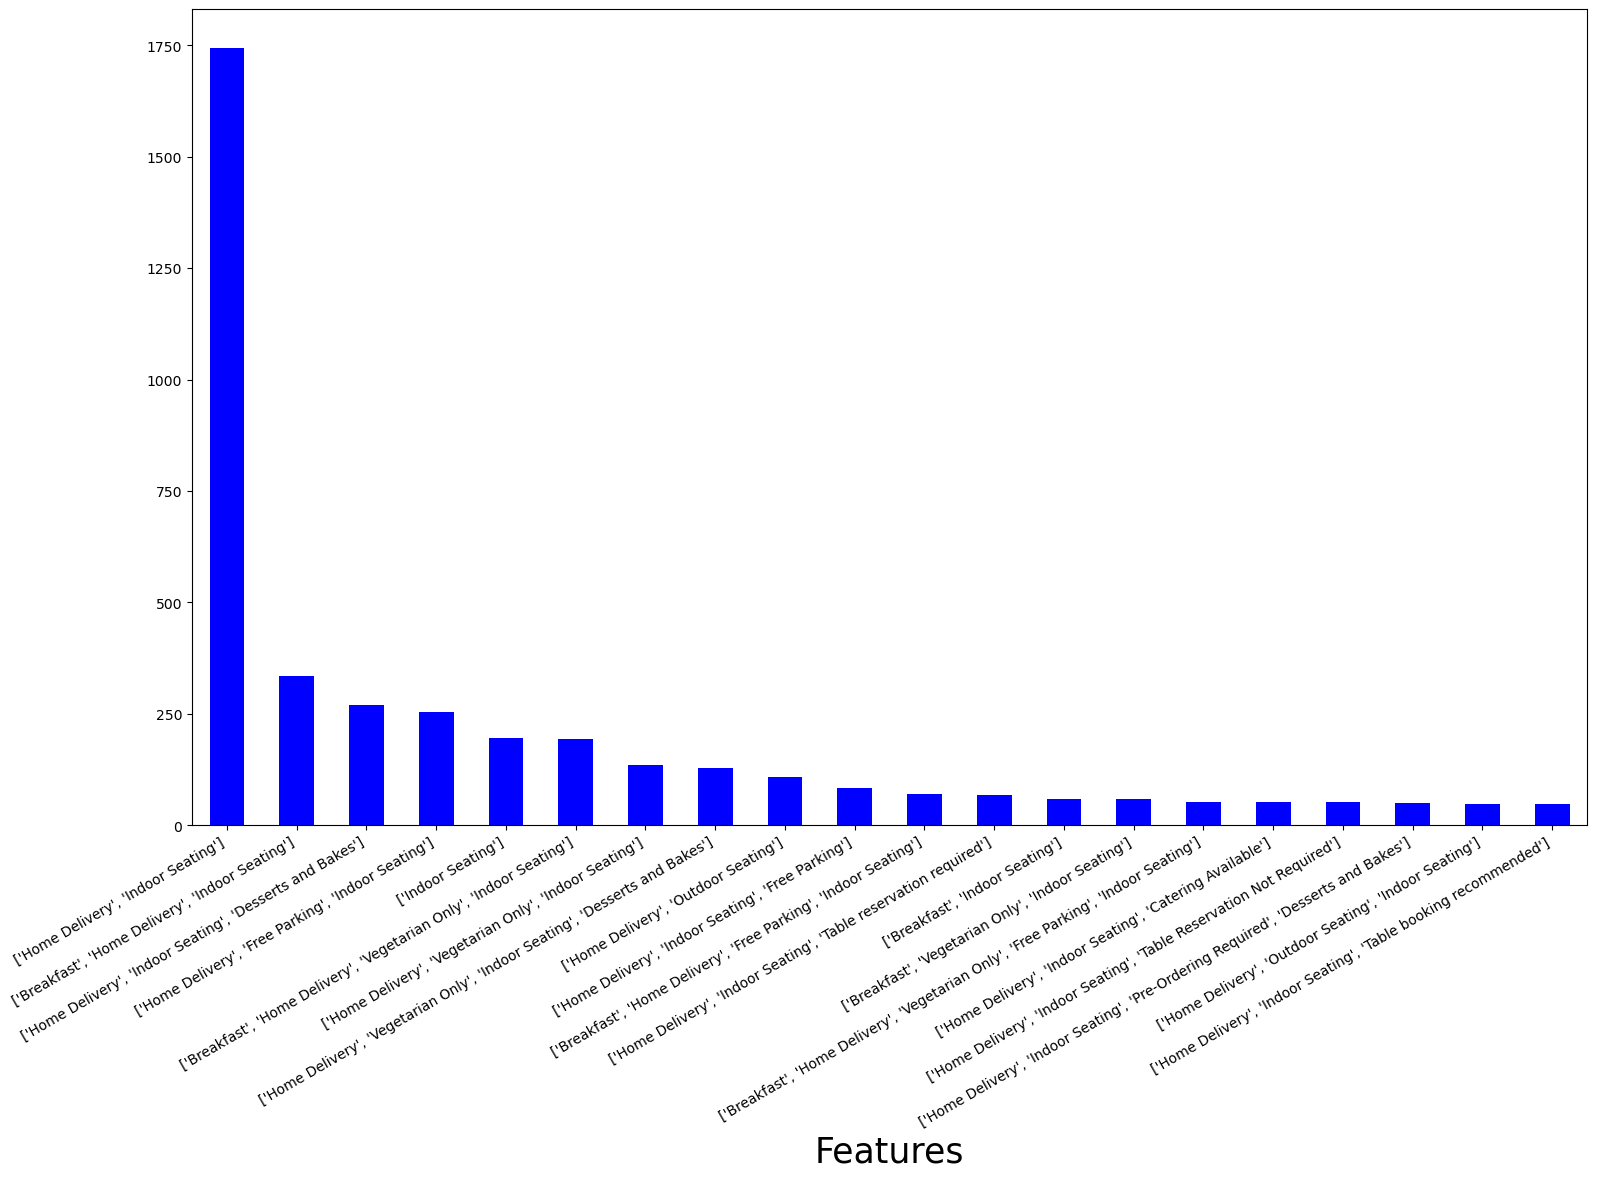

In [124]:
plt.figure(figsize=(18,12))
raw_df['Features'].value_counts().nlargest(20).plot.bar(color='blue')
plt.gcf().autofmt_xdate()
plt.xlabel('Features',size = 25)

In [125]:
raw_df.rename(columns={'Location': 'Location'},inplace=True)

In [126]:
raw_df.groupby('Location')['Name of Restaurant'].unique()

Location
 InterContinental Chennai Mahabalipuram Resort, East...                                            [KoKoMMo]
Abhiramapuram                                                             [Thug Life Cafe, Sri Sankara Mess]
Abu Sarovar Portico, Egmore                                                                            [926]
Adambakkam                                                 [Hotel Mass, V.V.S Chettinadu, Adambakkam Mogu...
Adyar                                                      [Midnight Madness, Azzuri Bay, Rain Forest, Ol...
                                                                                 ...                        
Vivira Mall, Navallur                                                                           [Mcdonald's]
Washermenpet                                               [Madras2Chennai, Hotel Surya, Hotel Sivari, At...
WelcomHotel, RK Salai (Cathedral Road)                     [WelcomCafe Marina - WelcomHotel, Earthen Oven...
West Mamba

In [128]:
restaurant=[]
location=[]
for key,location_raw_df in raw_df.groupby('Location'):
    location.append(key)
    restaurant.append(len(location_raw_df['Name of Restaurant'].unique()))

In [129]:
raw_df_total=pd.DataFrame(zip(location,restaurant))
raw_df_total.columns=['Location','Restaurants']
raw_df_total.set_index('Location',inplace=True)
raw_df_total.sort_values(by='Restaurants').tail(10)

,Restaurants
Location,
Medavakkam,128
Perambur,136
Perungudi,139
Ramapuram,141
Nungambakkam,145
Ambattur,165
Anna Nagar East,172
T. Nagar,180
Velachery,181


<Axes: xlabel='Location'>

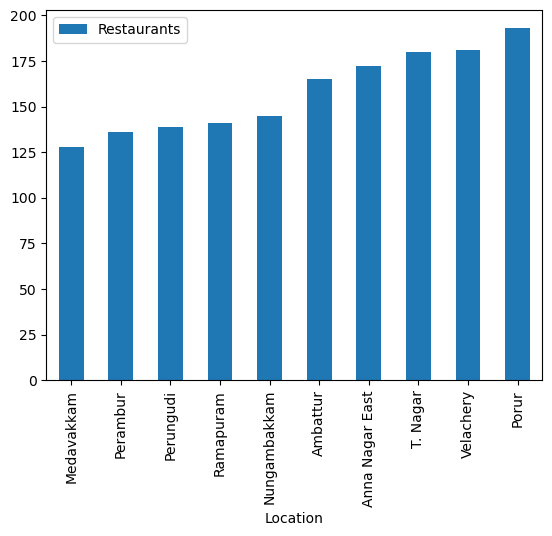

In [130]:
raw_df_total.sort_values(by='Restaurants').tail(10).plot.bar()

In [131]:
raw_df_total.sort_values(by='Restaurants').tail(10).index

Index(['Medavakkam', 'Perambur', 'Perungudi', 'Ramapuram', 'Nungambakkam',
       'Ambattur', 'Anna Nagar East', 'T. Nagar', 'Velachery', 'Porur'],
      dtype='object', name='Location')

In [150]:
import plotly.graph_objs as go
from plotly.offline import iplot


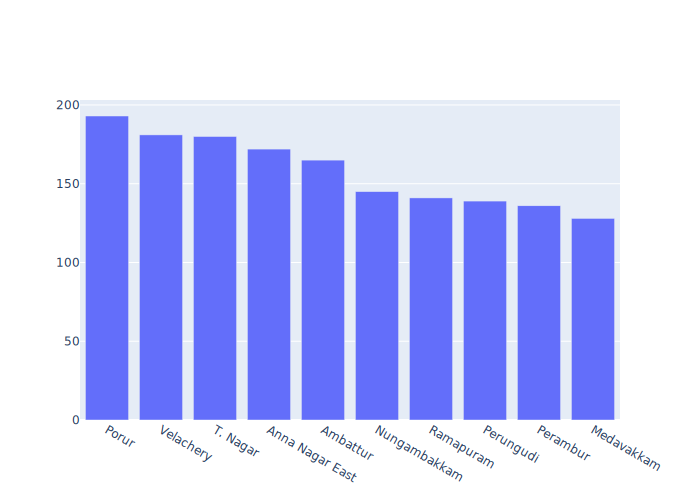

In [151]:
from plotly.offline import iplot

trace1 = go.Bar(x=raw_df_total['Restaurants'].nlargest(10).index, y=raw_df_total['Restaurants'].nlargest(10), name='Priority')

iplot([trace1])

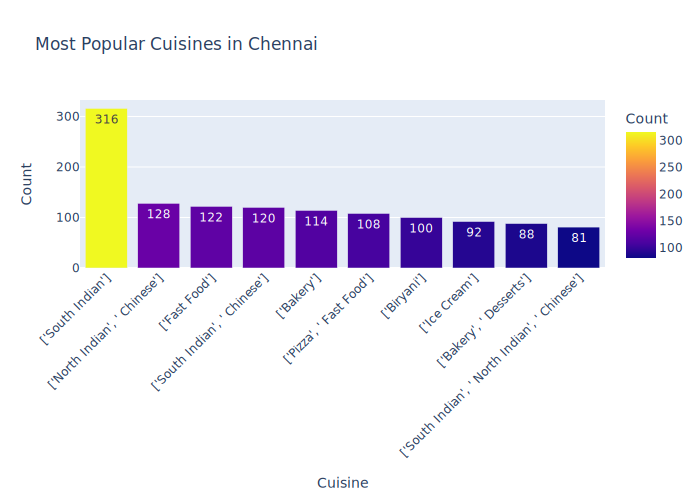

In [155]:
import plotly.express as px

# Get the top 10 cuisines
cuisines = raw_df['Cuisine'].value_counts()[:10]

# Create a DataFrame for Plotly
cuisine_df = pd.DataFrame({'Cuisine': cuisines.index, 'Count': cuisines.values})

# Create a bar graph using Plotly
fig = px.bar(cuisine_df, x='Cuisine', y='Count', title='Most Popular Cuisines in Chennai', 
             labels={'Cuisine': 'Cuisine', 'Count': 'Count'}, 
             text='Count', color='Count')

# Update layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Cuisine', yaxis_title='Count')

# Show the plot
fig.show()


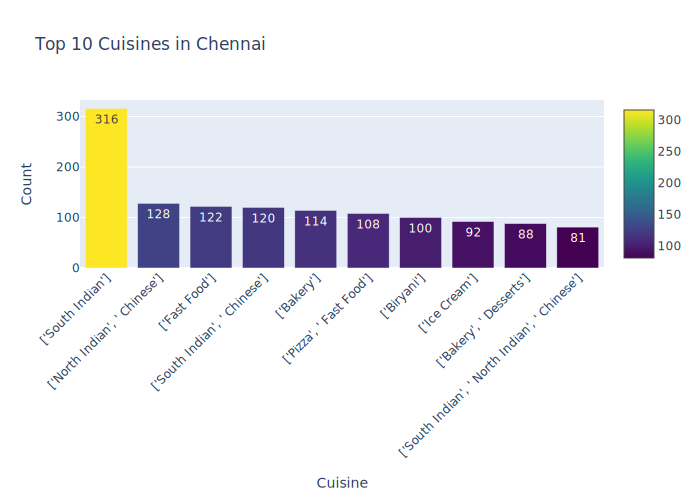

In [164]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get the top 10 cuisines
cuisines = raw_df['Cuisine'].value_counts()[:10]

# Create a bar graph
trace1 = go.Bar(
    x=cuisines.index,
    y=cuisines,
    marker=dict(color=cuisines, colorscale='Viridis', showscale=True),
    text=cuisines,
    textposition='auto',
    name='Cuisine'
)

# Create figure and add traces
fig = make_subplots(rows=1, cols=1)

fig.add_trace(trace1)

# Update layout
fig.update_layout(
    title='Top 10 Cuisines in Chennai',
    xaxis_title='Cuisine',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    showlegend=False
)

# Show the plot
fig.show()


# Analyse Approx cost for 2 people

In [158]:
len(raw_df['Price for 2'].value_counts())

59

In [159]:
raw_df['Price for 2'].isna().sum()

0

In [160]:
raw_df['Price for 2'].unique()

array([ 500., 1000.,  450.,  800., 1400.,  700.,  350.,  900.,  300.,
       1200., 2000.,  400.,  650., 1500.,  250.,  550.,  600.,  750.,
        200., 1800., 1100., 1600., 2500.,  100., 2700., 1700., 1300.,
        150., 1650.,  850., 2400., 3400., 1350., 3500., 2800., 4500.,
       4000., 3100., 3000., 2600., 1850., 1900., 3300., 2200., 2100.,
       4800., 5000., 3800., 3200., 1550., 2300.,  950.,   60., 1150.,
        160.,   40.,  120.,  330.,  140.])

In [161]:
raw_df['Price for 2'].dtype

dtype('float64')

In [162]:
raw_df['Price for 2']

0         500.0
1        1000.0
2         500.0
3         500.0
4         450.0
          ...  
11777     450.0
11785     400.0
11794     200.0
11801     150.0
11802     150.0
Name: Price for 2, Length: 6681, dtype: float64

# Cheapest Rate for 2 people

In [163]:
raw_df['Price for 2'].min()

40.0

In [165]:
raw_df[raw_df['Price for 2']== 40]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
4685,https://www.zomato.com/chennai/soda-hub-navallur,Soda Hub,"92, OMR Road, Navallur, Chennai","OMR Food Street, Navallur",['Beverages'],NaN,40.0,3.2,8,NaN,NaN,"['Takeaway Only', 'Vegetarian Only', 'Desserts..."


# Most costly for 2 people

In [166]:
raw_df['Price for 2'].max()

5000.0

In [167]:
raw_df[raw_df['Price for 2']== 5000.0]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
826,https://www.zomato.com/chennai/blend-taj-club-...,Blend - Taj Club House,"Taj Club House Hotel, 2, Club House Road, An...","Taj Club House, Thousand Lights",['Finger Food'],"['Cocktails', ' Beer']",5000.0,4.1,271,NaN,NaN,"['Wheelchair Accessible', 'Full Bar Available'..."


# Distribution of cost for 2 people

/var/folders/m7/dqkzc2r91x7dhl9_b70f28hr0000gn/T/ipykernel_1177/463889215.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




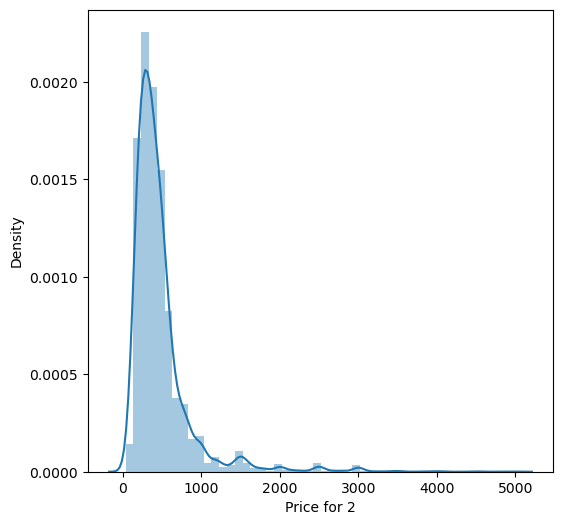

In [169]:
plt.figure(figsize=(6,6))
sns.distplot(raw_df['Price for 2'])
plt.show()

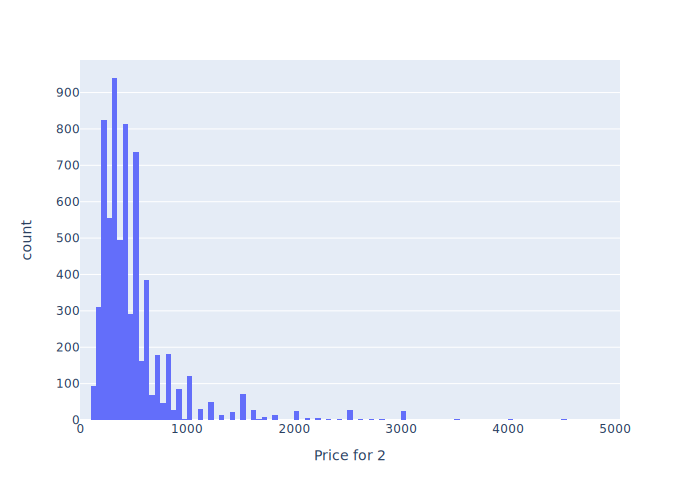

In [170]:
px.histogram(raw_df, x="Price for 2")

# Most costly Rate for 2 people

<Axes: >

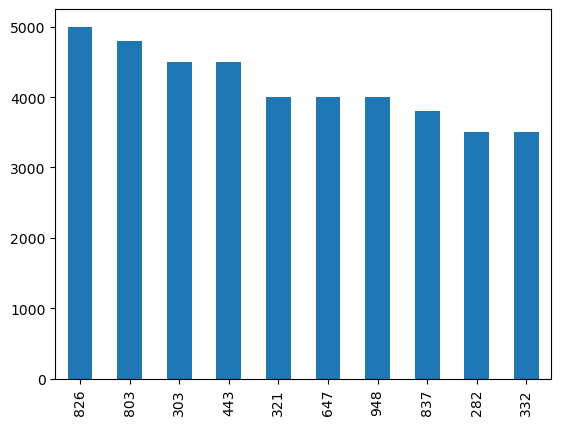

In [171]:
raw_df['Price for 2'].nlargest(10).plot.bar()

In [172]:
len(raw_df['Location'].unique())

264